In [1]:
#For creating the dataframe, creating jittering values, generating a color palette
import numpy as np
import pandas as pd
import random

#For creating the plot
import holoviews as hv
import panel as pn
from holoviews import opts
from bokeh.models import HoverTool, ColumnDataSource, CustomJS
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh import settings
from bokeh.io import push_notebook

#For creating the custom color panel
import matplotlib.pyplot as plt
import colorcet as cc 
#Creating the desaturation function
import colorsys
import matplotlib.colors as mcolors


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
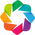

In [2]:
# Enable the HoloViews extension
hv.extension('bokeh')

In [39]:
#Note that every time you run this function, it will generate a new random palette
#Base galaxy palette for categorical variables
#Going to develop several desaturated versions for overlay of plot

# Define a set of base galaxy colors (purples, blues, pinks, teals, golds, etc.)
base_colors = [
    "#7A4E9F", # deep purple
    "#00bcd4", #teal
    "#4A90E2", # nebula blue
    "#d6859d", # cosmic pink
    "#9B59B6", # starry violet
    "#F8D210", # golden star dust
    "#4c84ed", # light blue
    "#AB80A3", # lavender mist
    "#FFFFFF", # starlight white
    "#adb2ba", # grey
]

def generate_galaxy_palette(base_colors, n_colors):
#     # Create a list of RGB tuples from the hex colors
    color_tuples = [mcolors.hex2color(color) for color in base_colors]
    
#     # Generate a colormap from these base colors
    cmap = mcolors.LinearSegmentedColormap.from_list("galaxy", color_tuples, N=n_colors)
    
#     # Return the list of colors in hexadecimal form
    return [mcolors.rgb2hex(cmap(i / (n_colors - 1))) for i in range(n_colors)]

# # Generate the palette with 303 colors
galaxy_palette = generate_galaxy_palette(base_colors, 303)

# # Randomize the palette
random.shuffle(galaxy_palette)

In [29]:
galaxy_palette

['#d145e6',
 '#dfff26',
 '#456ee6',
 '#458be6',
 '#aacc00',
 '#ffd226',
 '#ecff26',
 '#6bff26',
 '#00cc30',
 '#cc8d00',
 '#79cc00',
 '#45e66e',
 '#9eff26',
 '#e6ca45',
 '#26f4ff',
 '#4be645',
 '#d2ff26',
 '#cc007d',
 '#cca600',
 '#e6a445',
 '#68e645',
 '#e67e45',
 '#0039cc',
 '#cc00ae',
 '#7100cc',
 '#e6456b',
 '#45e68b',
 '#cc0071',
 '#45e6ce',
 '#2633ff',
 '#45e69e',
 '#cc00c6',
 '#269aff',
 '#45a7e6',
 '#cc1400',
 '#cc0095',
 '#4d00cc',
 '#9500cc',
 '#c2cc00',
 '#e64561',
 '#9a26ff',
 '#91cc00',
 '#a1e645',
 '#cc0800',
 '#e6c145',
 '#cc2000',
 '#8ee645',
 '#e645d4',
 '#e645b7',
 '#4565e6',
 '#ff2662',
 '#00cc3d',
 '#4026ff',
 '#2680ff',
 '#ab45e6',
 '#ba00cc',
 '#cc0010',
 '#2bff26',
 '#ae00cc',
 '#00ccc2',
 '#ff26f0',
 '#ccb200',
 '#ff3726',
 '#e6de45',
 '#abff26',
 '#8900cc',
 '#cc5100',
 '#45e65b',
 '#9845e6',
 '#f9ff26',
 '#dae645',
 '#00cc79',
 '#e6b745',
 '#cc0089',
 '#bee645',
 '#ff26bc',
 '#00becc',
 '#e68845',
 '#0051cc',
 '#0075cc',
 '#cc4500',
 '#26ffbc',
 '#7426ff',
 '#4

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
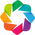

In [40]:
#Desaturation Function for color palette
import holoviews as hv
import matplotlib.colors as mcolors
import colorsys
import numpy as np
import pandas as pd

# Enable the Holoviews extension
hv.extension('bokeh')
# Step 2: Function to desaturate a color
def desaturate_color(hex_color, saturation_factor):
    """
    Desaturate a color by a given factor.

    Parameters:
        hex_color (str): Color in hex format (e.g., "#ff5733").
        saturation_factor (float): Factor to desaturate the color (0 is completely desaturated, 1 is original saturation).

    Returns:
        str: Desaturated color in hex format.
    """
    # Convert hex color to RGB
    rgb = mcolors.hex2color(hex_color)
    
    # Convert RGB to HSL
    h, l, s = colorsys.rgb_to_hls(rgb[0], rgb[1], rgb[2])
    
    # Apply saturation adjustment
    s = s * saturation_factor  # Adjust saturation (0 means no saturation, 1 means full saturation)
    
    # Convert back to RGB
    rgb_desaturated = colorsys.hls_to_rgb(h, l, s)
    
    # Convert RGB back to hex
    return mcolors.rgb2hex(rgb_desaturated)


In [41]:

# Desaturate the palette
desaturated_galaxy = [desaturate_color(color, saturation_factor=0.5) for color in galaxy_palette]


In [ ]:
desaturated_galaxy

In [25]:
random.shuffle(desaturated_galaxy)

In [42]:
#Assigning each hex code to a number from 1-295 for use in plotting
desaturated_list= list(desaturated_galaxy)
color_map_custom= {i + 1: desaturated_list[i] for i in range(len(desaturated_list))}

In [43]:
color_map_custom

{1: '#8998a3',
 2: '#8796b8',
 3: '#bec0c3',
 4: '#bc95a4',
 5: '#78628b',
 6: '#968fab',
 7: '#77688f',
 8: '#aa85a0',
 9: '#468a9d',
 10: '#9ba08b',
 11: '#ae9383',
 12: '#b7a161',
 13: '#babcbf',
 14: '#988da6',
 15: '#a47f9e',
 16: '#e9e9ea',
 17: '#9798b4',
 18: '#b6a856',
 19: '#657c9a',
 20: '#ede9ec',
 21: '#5093ac',
 22: '#b0a661',
 23: '#f8f7f8',
 24: '#94729e',
 25: '#9498b5',
 26: '#b8a35f',
 27: '#7991c2',
 28: '#7a92bc',
 29: '#d4d5d7',
 30: '#9b8ba1',
 31: '#9a8ca3',
 32: '#9292b3',
 33: '#6793b8',
 34: '#dfe0e2',
 35: '#b4a4b1',
 36: '#e7e2e6',
 37: '#a8a36f',
 38: '#a88a8f',
 39: '#7d95ba',
 40: '#b796a6',
 41: '#3b93a2',
 42: '#dcdee0',
 43: '#cacccf',
 44: '#b29a73',
 45: '#6e93bb',
 46: '#78658d',
 47: '#7790c3',
 48: '#9298b5',
 49: '#7b93b8',
 50: '#beab4b',
 51: '#d6d7d9',
 52: '#9998b3',
 53: '#4793a8',
 54: '#5b93b2',
 55: '#fefefe',
 56: '#bcaa4e',
 57: '#8e92b5',
 58: '#3b909e',
 59: '#9490ae',
 60: '#39929f',
 61: '#b69f67',
 62: '#766b91',
 63: '#b39b70',
 

In [ ]:
#The "test_points.csv" file includes the species name, the "scaled" loss (loss/10,000), and dummy x and  y variables created in Excel
#with the birds with the highest loss values grouping in the middle of the plot and expanding outwards (See notes below)

#Loading csv of dummy variables matched to each key
main_df= pd.read_csv('test_points.csv')

Notes showing clusters of points arranged by value of loss, with high loss values in the center and decreasing outwards.
Dummy x and y variables are determined by 
![notes](462583242_1087349819444400_8585818735820504019_n.jpg)

Dummy X and Y variables created in Excel and shown below:
Pink values show loss E-05, purple values show loss E-04
![notes](coordinates_screenshot.png) 


In [ ]:
#Have each variable repeat "loss_scaled" number of times
main_df = main_df.loc[main_df.index.repeat(main_df['loss_scaled'])].reset_index(drop=True)

In [ ]:
#Dummy x normal jitter

main_df['x_jittered']= main_df['x']+ np.random.normal(loc=0, scale=1.5, size=359500)

In [ ]:
#Dummy y normal jitter

main_df['y_jitter']= main_df['y']+np.random.normal(loc=0, scale=1.5, size=359500)

In [ ]:
#Save dataframe to csv
main_df.to_csv('full_dataset_output.csv', index=False) 

In [ ]:
#At this stage, I hosted the file online on Hugging Face. However, the plot can still be generated locally.

In [ ]:
#Accessing the full dataset from Hugging Face can reduce rendering time
#Install huggingface_hub from the PyPi registry:
!pip install --upgrade huggingface_hub

In [ ]:
#Check that huggingface_hub works properly by running the following command
!python -c "from huggingface_hub import model_info; print(model_info('gpt2'))"

In [9]:
#Loading hosted csv file on hugging face
#Hosted online to reduce rendering time

main_df = pd.read_csv("hf://datasets/yungwoolz/birdlossdataset/full_dataset_output.csv")

In [24]:
len(main_df['species'].unique())

295

In [25]:
#Find ranges of x and y jittered values
x_min = main_df['x_jittered'].min()
x_max = main_df['x_jittered'].max()
y_min=  main_df['y_jitter'].min()
y_max = main_df['y_jitter'].max()

In [26]:
x_min

140.68547022858837

In [ ]:
x_max

In [ ]:
y_min

In [ ]:
y_max

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
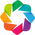

BokehModel(combine_events=True, render_bundle={'docs_json': {'3d8b4a52-955c-4073-bb27-86621205de06': {'version…

Column(css_classes=['center-wrapper'], height_policy='max', width_policy='max')
    [0] Column(css_classes=['center-wrapper'])
        [0] Row
            [0] Select(name=' ', options=['All Species', ...], value='All Species')
        [1] Row
            [0] ParamFunction(function, _pane=HoloViews, css_classes=['plot-container'], defer_load=False, sizing_mode='scale_both')

In [44]:
#Trying MOD12 with space instead of "Species"
import pandas as pd
import holoviews as hv
import panel as pn
from holoviews import opts

hv.extension("bokeh")

#version_5= pd.read_csv("hf://datasets/yungwoolz/birdlossdataset/full_dataset_output.csv")

# Load sample data (replace with your own data)
#species_list_csv = pd.read_csv('C:/Users/Amanda/Documents/Acadamia/CUNY/Fall 2024/Capstone/workspace/test_points.csv')
#species_list = pd.DataFrame(species_list_csv)

# Dropdown options
species = ["All Species"] + sorted(list(set(main_df['species'])))

def hook(plot, element):
    plot.handles["xaxis"].visible = False
    plot.handles["yaxis"].visible = False 
    # plot.handles["xgrid"].visible = False
    # plot.handles["ygrid"].visible = False
    plot.handles["plot"].border_fill_color = None
    plot.handles["plot"].background_fill_color = None
    plot.handles["plot"].outline_line_color = None


# Define a function to generate the dynamic plot
def generate_dynamic_plot(selected_feature):
    if selected_feature == "All Species":
        # Display the full scatter plot for all data
        return scatter_full
    else:
        # Filter data for the selected feature
        filtered_data = main_df[main_df["species"] == selected_feature]
        
        # Check if the data is empty and return a text message if so
        if filtered_data.empty:
            return hv.Text(0.5, 0.5, "No data available for selected species").opts(
                opts.Text(text_font_size="15pt", text_align="center", title="No Data")
            )
        
        # Create an hv.Points plot with filtered data
        filtered_points = hv.Points(
            filtered_data, kdims=['x_jittered', 'y_jitter'], vdims=['species', 'key']
        ).opts(
            color="key",
            cmap=color_map_custom,  # Example colormap
            size=1.7,
            alpha=0.8,
            #height=600,
            #width=900,
            responsive=True,
            xlim=(138, 171),
            ylim=(142, 185),
            xaxis=None,
            yaxis=None,
            show_legend=False
        ).opts(hooks=[hook])

        return filtered_points

# Create dropdown widget
dropdown = pn.widgets.Select(name=" ", options=species, value="All Species", width=300)

#Scatter plot for all data
scatter_full= hv.Points(main_df, kdims=['x_jittered', 'y_jitter'], vdims=['species', 'key']).opts(
    color="key",
    #Custom color map to map individual color to each key
    cmap=color_map_custom,
    size=1.5,
    alpha=0.2,
    #height=600,
    #width=900,
    responsive=True,
    xlim=(138, 171),
    ylim=(142, 185),
    xaxis=None,
    yaxis=None,
    show_legend=False,
    bgcolor=None
).opts(hooks=[hook])

# Bind the dropdown value to the dynamic plotting function
dynamic_plot = pn.bind(generate_dynamic_plot, selected_feature=dropdown)

# Apply custom CSS for centering the content vertically and horizontally, and ensure it's responsive
css = """
.center-wrapper {
    position: relative;
    width: 100%;  /* Full width */
    height: 100%;  /* Full height */
    display: flex;
    justify-content: center;
    align-items: center;
    margin: 0;
}

.center-wrapper .dropdown-container {
    position: absolute;
    top: 10%;  /* Position dropdown near the top of the plot */
    z-index: 10;  /* Ensure the dropdown appears above the plot */
    width: 100%; /* Ensure the dropdown takes full width */
    display: flex;
    justify-content: center;
}

.center-wrapper .plot-container {
    width: 100%;
    height: 100%;
}

.center-wrapper > div {
    width: 100%;  /* Ensure inner elements like dropdown and plot stretch to max width available */
    margin: 0; /* Remove any default margin between elements */
}

.center-wrapper > div > .pn-widget,
.center-wrapper > div > .hv-plot {
    margin: 0; /* Remove any margin from the widget or plot elements */
    padding: 0; /* Remove padding between elements */
}

@media (max-width: 600px) {
    .center-wrapper {
        padding: 10px; /* Add padding on small screens */
    }
    .center-wrapper > div {
        width: 100% !important; /* Make inner elements stretch fully on small screens */
    }
}
"""

# Inject CSS into Panel
pn.extension(raw_css=[css])

# Create the content layout with dropdown on top of the plot (overlay)
content = pn.Column(
    pn.Row(pn.panel(dropdown, sizing_mode="fixed", css_classes=["dropdown-container"])),
    #pn.Row(pn.panel(feature_info, sizing_mode="fixed")),
    pn.Row(pn.panel(dynamic_plot, sizing_mode="scale_both", css_classes=["plot-container"])),
    css_classes=["center-wrapper"]
)

# Create the layout using the `center-wrapper` class for centering
layout = pn.Column(
    content,
    css_classes=["center-wrapper"],
    width_policy="max",  # Ensure content adapts to maximum width
    height_policy="max"  # Ensure content adapts to maximum height
)

# Save the plot with embedded resources (ensure interactivity is maintained)
layout.save(
    filename='plot_final.html',
    resources='inline',  # Inline all resources to ensure interactivity works
    embed=True  # Embed resources inside the HTML
)

# Show the plot in the browser
layout.servable()  # Use this if running in a Jupyter notebook or a Panel server